In [42]:
# A bank found that the average number of cars waiting during the 
# noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. 
# Make a chart of this distribution and answer these questions concerning the probability 
# of cars waiting at the drive-up window.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

mean = 2

meteors = stats.poisson(mean)
meteors




# x = np.arange(0,8)
# y = [meteors.pmf(i) for i in x]

# plt.bar(x,y)

# plt.xlabel('Meteor Events Per 100 Years')
# plt.ylabel('Probability of Meteor Event')
# plt.title('Poisson Distribution of Meteor Events in 100 year Window')
# plt.show()


# What is the probability that no cars drive up in the noon hour?
print('the probability no cars will show up', round(meteors.pmf(0),2))




# What is the probability that 3 or more cars come through the drive through?
print('the probability 3 or more cars show up', round(meteors.sf(2),2))




# How likely is it that the drive through gets at least 1 car?
print('drive through gets at least 1 car', round(meteors.sf(0),2))



# Grades of State University graduates are normally distributed with a mean of 3.0 
# and a standard deviation of .3. Calculate the following:
test_numbers = stats.norm(3, .3)



# What grade point average is required to be in the top 5% of the graduating class?
print('What grade point average is required to be in the top 5% of the graduating class?')
print(round(test_numbers.isf(.05),2))




# What GPA constitutes the bottom 15% of the class?
print('What GPA constitutes the bottom 15% of the class?')
print(round(test_numbers.isf(.85),2))
print(round(test_numbers.ppf(.15),2))








the probability no cars will show up 0.14
the probability 3 or more cars show up 0.32
drive through gets at least 1 car 0.86
What grade point average is required to be in the top 5% of the graduating class?
3.49
What GPA constitutes the bottom 15% of the class?
2.69
2.69


In [91]:
from env import username, hostname, password
import pandas as pd
import numpy as np
from pydataset import data


# Connect to the employees database and find the average salary of current employees, 
# along with the standard deviation. For the following questions, 



# calculate the answer based on modeling the employees salaries with a normal distribution 
# defined by the calculated mean and standard deviation then compare this answer to the actual 
# values present in the salaries dataset.

def get_db_url(username, hostname, password, db_name):
    return f'mysql+pymysql://{username}:{password}@{hostname}/{db_name}'

db_name = 'employees'

url = get_db_url(username, hostname, password, db_name)
query = '''
select employees.emp_no, salaries.to_date, salaries.salary from employees
join salaries using(emp_no)
where to_date > curdate()
;
'''
employees = pd.read_sql(query, url)

employees

,emp_no,to_date,salary
0,10001,9999-01-01,88958
1,10002,9999-01-01,72527
2,10003,9999-01-01,43311
3,10004,9999-01-01,74057
4,10005,9999-01-01,94692
...,...,...,...
240119,499995,9999-01-01,52868
240120,499996,9999-01-01,69501
240121,499997,9999-01-01,83441
240122,499998,9999-01-01,55003


In [92]:
the_largest_salary = employees.groupby(by=employees.emp_no).agg('max')



mean = the_largest_salary.salary.mean()
standard_dev = the_largest_salary.salary.std()
the_test = stats.norm(mean, standard_dev)
# the_test.rvs(1000000)
the_test

In [93]:

# What percent of employees earn less than 60,000?
print(the_test.cdf(60000))


0.24385742480214423


In [94]:

# What percent of employees earn more than 95,000?
print(the_test.sf(95000))

# What percent of employees earn between 65,000 and 80,000?
the_test_array = the_test.rvs(1000000)

the_test_series = pd.Series(the_test_array)
print(((the_test_series > 65000) & (the_test_series < 80000)).mean())




# What do the top 5% of employees make?
print(the_test.isf(.05))

0.09208819199804053
0.335402
100484.64454102777


In [49]:

# A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors 
# and 97 click-throughs. How likely is it that this many people or more click through?

# 4326
# 2%
# 97

the_test = stats.binom(4326, .02)
the_test.sf(96)
1 - the_test.cdf(96)## says the same thing as the line above

0.1397582363141645

In [88]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 

# After several weeks of careful observation, you notice that the average number of people in line 
# when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 

# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go 
# back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

# 2 mins each person
# 10 minutes from ordering to get food
# at least 15 minutes left 
# one hour total time

mean = 15
sd = 3
people_time = stats.norm(mean, sd)
the_test = pd.Series(people_time.rvs(100000))

the_test = the_test*2

the_test = the_test + 10

print((the_test + 17 <= 60).mean())

0.69237


In [81]:
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 

# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

# How likely is it that the break area gets cleaned up each day? How likely is it that it goes 
# two days without getting cleaned up? All week?

students = (22 * 3) 
print(students)
# 3% chance cleaned up
# 90% students visit per day
# 22 students
# check each day, week
the_test2 = stats.binom(students, .03)
print(the_test2)
print('the probability someone cleans up')
print(the_test2.sf(0))
the_test2 = stats.binom(students * 2, .03)
print(the_test2.sf(0))
the_test2 = stats.binom(students * 5, .03)
print(the_test2.sf(0))

print(the_test2.pmf(1))
print(the_test2.pmf(2))
print(the_test2.pmf(5))

66
the probability someone cleans up
0.866052546499143
0.9820580797006357
0.9999568806398352
0.00044008419137202466
0.0022389850354855166
0.03860003498987839


In [125]:
# You are working on some statistics homework consisting of 100 questions where all 
# of the answers are a probability rounded to the hundreths place. Looking to save time, 
# you put down random probabilities as the answer to each question.

# What is the probability that at least one of your first 60 answers is correct?


# random probabilities

# 100 questions
# first 60 right 1/60 = decimal
# the number 1
## 1 / 100 to get .01
print(stats.binom(60, 1/60).sf(0))
print()
print(stats.binom(60, .01).sf(0))## the answer

print()
print(stats.binom(60, .016666666666666666).sf(0))
print()
print(stats.binom(60, .02).sf(0))
print()
print(1/60)
print(.01)


0.6352076892466552

0.45284335760923855

0.6352076892466552

0.7024468573078793

0.016666666666666666
0.01


In [46]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify 
# for this scholarship?
print('Would a student with a 2.8 grade point average qualify')
# for this scholarship?')


print(round(test_numbers.isf(2/3),2)) ## supposed to be getting a range
print(test_numbers.isf(2/3))



#yes because they are in the lower third of the class 

# If I have a GPA of 3.5, what percentile am I in?

print(round(test_numbers.isf(1/3),2)) ### the uppper third decile
print(test_numbers.cdf(3.5)) ### the question is asking for a percent


#the upper third percentile

##decile 1st 0 - 10 percentile
##decile 2nd 10 - 20 percentile
##decile 3rd 20 - 30 percentile

Would a student with a 2.8 grade point average qualify
2.87
2.870781810211363
3.13
0.9522096477271853


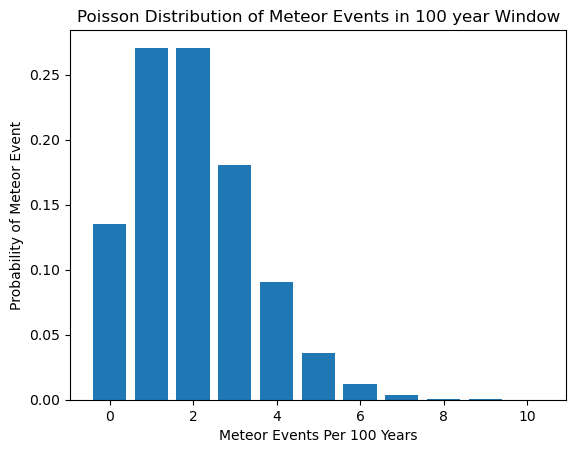

In [50]:
x = np.arange(0,11)
y = stats.poisson(mean).pmf(x)

plt.bar(x,y)

plt.xlabel('Meteor Events Per 100 Years')
plt.ylabel('Probability of Meteor Event')
plt.title('Poisson Distribution of Meteor Events in 100 year Window')
plt.show()

In [62]:
click = np.random.choice([0,1], (100000, 4326), p = [.98, .02])
(click.sum(axis=1) > 96).mean()

0.13805